# Lesson 24b: Plots - circle, bar, box and histogram

## Import libraries and load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline  

# This is added to see plots in Jupyter.

In [4]:
bar = pd.read_csv("weather_barcelona.csv", index_col = "Date")
bar.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,17,11,0,13,7
2018-01-02,19,8,0,13,7
2018-01-03,23,11,0,13,7
2018-01-04,24,15,0,13,7
2018-01-05,20,10,0,13,7


In [5]:
rom = pd.read_csv("weather_rome.csv", index_col = "Date")
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,14,8,0,12,4
2018-01-02,13,7,0,12,4
2018-01-03,14,1,0,12,4
2018-01-04,16,6,0,12,4
2018-01-05,17,7,0,12,3


In [6]:
ams = pd.read_csv("weather_amsterdam.csv", index_col = "Date")
ams.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin
Date,,,,,
2018-01-01,8,6,1,4,1
2018-01-02,9,4,5,4,1
2018-01-03,11,6,8,4,1
2018-01-04,11,7,1,4,1
2018-01-05,8,5,3,4,1


In [7]:
temp_max = pd.DataFrame(index = bar.index)

In [8]:
temp_max["bar"] = bar["TempMax"]
temp_max["rom"] = rom["TempMax"]
temp_max["ams"] = ams["TempMax"]

temp_max.head()

,bar,rom,ams
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


In [9]:
# To prepare my data for the pie chart, I divide temperature into better then average and worse than that:

def GradeDay(row):
    if (row["TempMax"] >= row["AvgTempMax"]):
        return "PLUS"
    else:
        return "MINUS"
    
rom["GradeDay"] = rom.apply(GradeDay, axis=1)
bar["GradeDay"] = bar.apply(GradeDay, axis=1)
ams["GradeDay"] = ams.apply(GradeDay, axis=1)

In [10]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [11]:
rom["GradeDay"].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [12]:
# Next I create a new data frame which will store info on the numbers of nice and bad days for each city:

cities3 = pd.DataFrame(index = ["PLUS","MINUS"])

In [13]:
cities3["Barcelona"] = bar["GradeDay"].value_counts()
cities3["Rome"] = rom["GradeDay"].value_counts()
cities3["Amsterdam"] = ams["GradeDay"].value_counts()

In [14]:
cities3.head()

,Barcelona,Rome,Amsterdam
PLUS,64,70,68
MINUS,26,20,22


## Pie chart

<AxesSubplot:ylabel='Barcelona'>

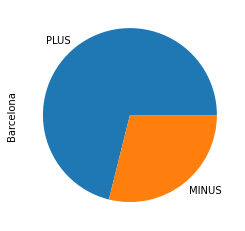

In [15]:
# To make the plot only for one city:

cities3["Barcelona"].plot(kind = "pie")

array([[<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Rome'>],
       [<AxesSubplot:ylabel='Amsterdam'>, <AxesSubplot:>]], dtype=object)

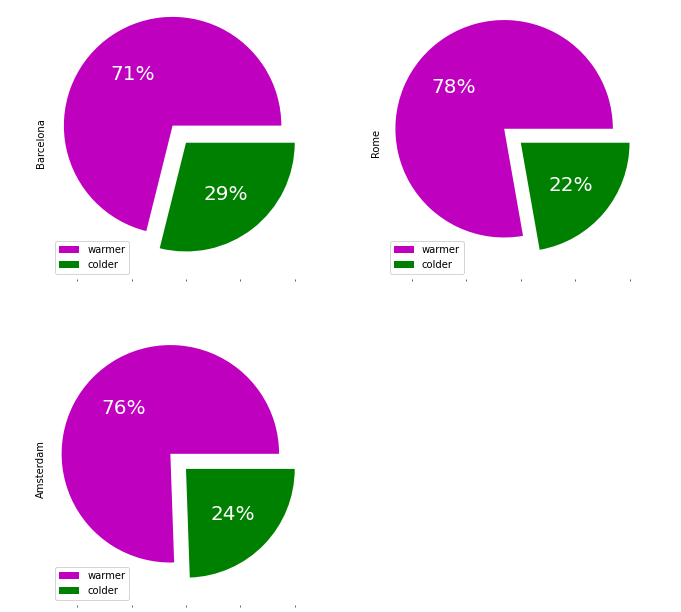

In [34]:
# Note that pie chart works only for a series or for a set of series:

# "explode" is to move a part of the chart

cities3.plot(kind = "pie", subplots = True, figsize = (11,11), colors = ["m","g"], labels = ["warmer","colder"],
            autopct = "%.0f%%", fontsize = 20, textprops = dict(color="white"), layout = (2,2), explode = (0.2,0))

## Bar plot

<AxesSubplot:>

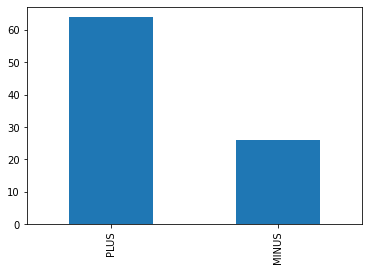

In [37]:
cities3["Barcelona"].plot(kind = "bar")

<AxesSubplot:>

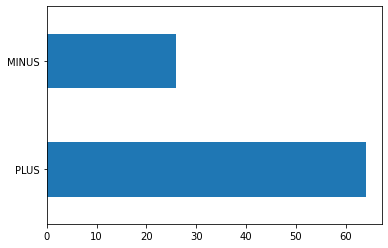

In [38]:
cities3["Barcelona"].plot(kind = "barh")

<AxesSubplot:>

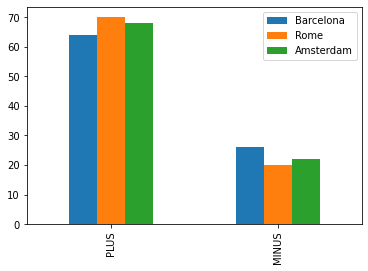

In [39]:
# Note that this kind of plot works on dataframe, and not only on a series:
cities3.plot(kind = "bar")

<AxesSubplot:>

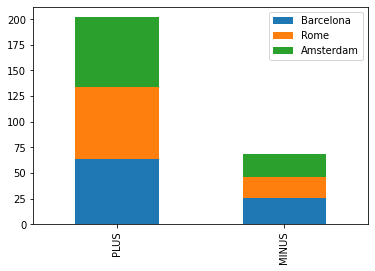

In [40]:
# To make a plot with bars one on the other:
cities3.plot(kind = "bar", stacked = True)

## Box plot

<AxesSubplot:>

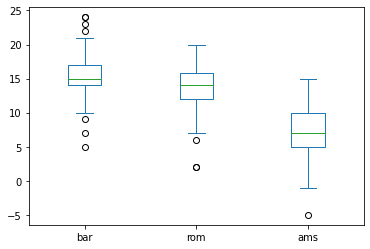

In [41]:
# This type of plot is useful for statistical data, where we are interested in mean, median, etc.

temp_max.plot(kind = "box")

<AxesSubplot:>

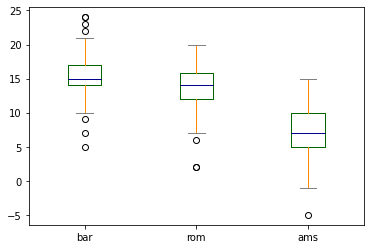

In [42]:
# To modify the plot we need to define things separately:
cols = dict(boxes = "DarkGreen", whiskers = "DarkOrange", medians = "DarkBlue", caps = "Grey")

temp_max.plot(kind = "box", color = cols)

## Histogram

<AxesSubplot:ylabel='Frequency'>

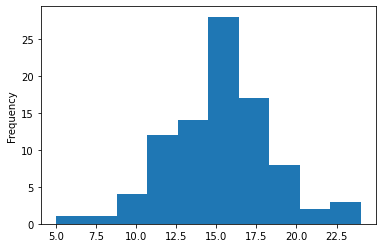

In [43]:
bar["TempMax"].plot(kind = "hist")

In [44]:
bar["TempMax"].value_counts().sort_index()

5      1
7      1
9      1
10     3
11     4
12     8
13     4
14    10
15    17
16    11
17     9
18     8
19     4
20     4
21     1
22     1
23     1
24     2
Name: TempMax, dtype: int64

In [45]:
# So note that the histogram above is not ideal. Let us fix it.

# We count how many different temperatures we registered.
bar["TempMax"].nunique()

18

<AxesSubplot:ylabel='Frequency'>

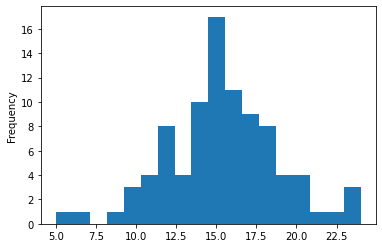

In [46]:
bar["TempMax"].plot(kind = "hist", bins = 18)